<a href="https://colab.research.google.com/github/Simrangupta2105/Image_Recognition_Model/blob/main/Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"simrangupta6547","key":"d46497f54a21bb38e9bbe0b10713e88b"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kagglehub

path = kagglehub.dataset_download('hojjatk/mnist-dataset')
print('Path to dataset files:', path)

Path to dataset files: /kaggle/input/mnist-dataset


In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Train shape: (x_train.shape), Test shape: (x_test.shape)")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (x_train.shape), Test shape: (x_test.shape)


In [ ]:
 x_train = x_train / 255.0;
 x_test = x_test / 255.0;
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(f"train reshaped: {x_train.shape}")

train reshaped: (60000, 28, 28, 1)


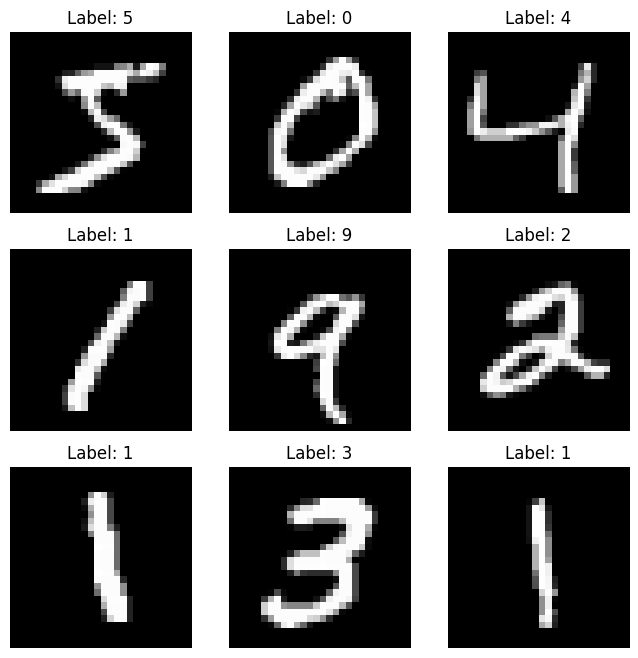

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i].reshape(28,28), cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

In [ ]:
(x_train_c10, y_train_c10),(x_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
x_train_c10 = x_train_c10 / 255.0;
x_test_c10 = x_test_c10 / 255.0;
print(f"Train shape: (x_train_c10.shape), Test shape: (x_test_c10.shape)")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Train shape: (x_train_c10.shape), Test shape: (x_test_c10.shape)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential([
      Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
     MaxPooling2D((2,2)),
      Conv2D(64, (3,3), activation='relu'),
     MaxPooling2D((2,2)),
      Flatten(),
      Dense(64, activation='relu'),
      Dense(10, activation='softmax'),
    ])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, epochs=5,batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.8825 - loss: 0.3784 - val_accuracy: 0.9778 - val_loss: 0.0717
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 26ms/step - accuracy: 0.9833 - loss: 0.0554 - val_accuracy: 0.9820 - val_loss: 0.0577
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9882 - loss: 0.0377 - val_accuracy: 0.9857 - val_loss: 0.0521
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.9913 - loss: 0.0281 - val_accuracy: 0.9876 - val_loss: 0.0435
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.9931 - loss: 0.0214 - val_accuracy: 0.9893 - val_loss: 0.0386


<function matplotlib.pyplot.show(close=None, block=None)>

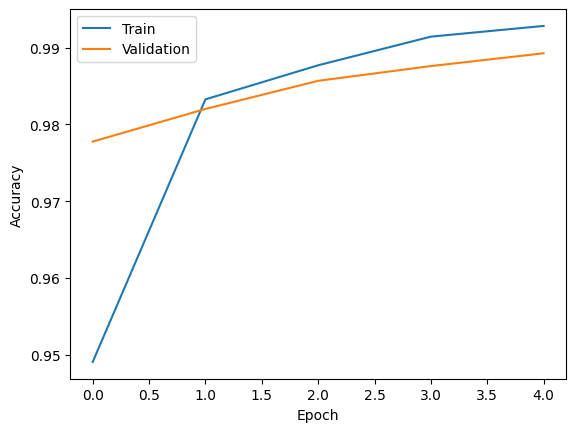

In [ ]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],
         label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:4f}")
y_pred=model.predict(x_test).argmax(axis=1)
print(y_pred.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9893 - loss: 0.0373
Test accuracy: 0.991000
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
(10000,)


In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential([
      Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
     MaxPooling2D((2,2)),
      Dropout(0.25),
      Conv2D(64, (3,3), activation='relu'),
     MaxPooling2D((2,2)),
      Flatten(),
      Dense(64, activation='relu'),
      Dense(10, activation='softmax'),
    ])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip =True
)
datagen.fit(x_train_c10)

In [ ]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(datagen.flow(x_train_c10, y_train_c10, batch_size=32), epochs=10, validation_data=(x_test_c10,y_test_c10))
model.summary()

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 113s 71ms/step - accuracy: 0.3925 - loss: 1.6629 - val_accuracy: 0.5393 - val_loss: 1.3148
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 70ms/step - accuracy: 0.5836 - loss: 1.1872 - val_accuracy: 0.6405 - val_loss: 1.0393
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 70ms/step - accuracy: 0.6282 - loss: 1.0508 - val_accuracy: 0.5752 - val_loss: 1.2093
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 109s 70ms/step - accuracy: 0.6623 - loss: 0.9691 - val_accuracy: 0.6665 - val_loss: 0.9672
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 108s 69ms/step - accuracy: 0.6773 - loss: 0.9213 - val_accuracy: 0.6310 - val_loss: 1.0992
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 71ms/step - accuracy: 0.6954 - loss: 0.8722 - val_accuracy: 0.7171 - val_loss: 0.8214
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 109s 70ms/step - accuracy: 0.7022 - loss: 0.8491 - val_accuracy: 0.6983 - val_loss: 0.8788
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 108s 69ms/step - accuracy: 0.7128 - lo

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 480,864 (1.83 MB)

 Trainable params: 160,266 (626.04 KB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 320,534 (1.22 MB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1000
           1       0.76      0.89      0.82      1000
           2       0.77      0.46      0.58      1000
           3       0.53      0.49      0.51      1000
           4       0.68      0.69      0.68      1000
           5       0.80      0.36      0.49      1000
           6       0.59      0.90      0.71      1000
           7       0.68      0.82      0.74      1000
           8       0.90      0.71      0.80      1000
           9       0.67      0.87      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.69      0.68     10000
weighted avg       0.71      0.69      0.68     10000



<function matplotlib.pyplot.show(close=None, block=None)>

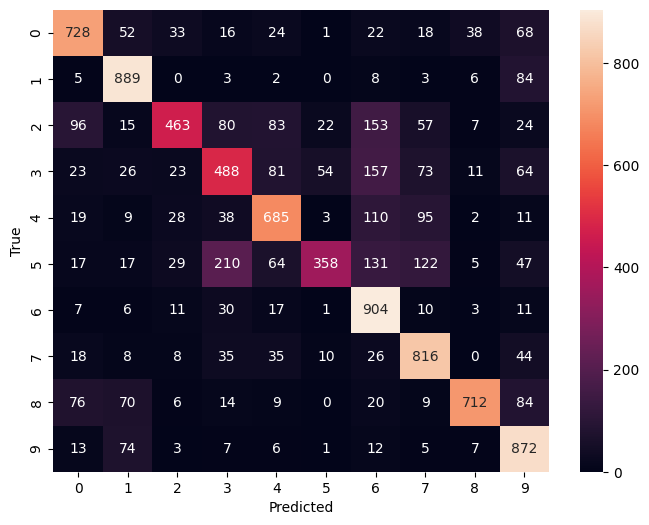

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred_c10 = model.predict(x_test_c10).argmax(axis=1)
cm=confusion_matrix(y_test_c10,y_pred_c10)
print(classification_report(y_test_c10,y_pred_c10))

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 73% 160M/218M [00:00<00:00, 705MB/s] 
100% 218M/218M [00:00<00:00, 342MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dogs-vs-cats')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats',target_size=(224, 224),batch_size=32,class_mode='binary',subset='training')
validation_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats',target_size=(224, 224),batch_size=32,class_mode='binary',subset='validation')

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

base_model = MobileNetV2(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=5, validation_data=validation_generator)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 387s 2s/step - accuracy: 0.7754 - loss: 0.5610 - val_accuracy: 0.7975 - val_loss: 0.5222
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 376s 1s/step - accuracy: 0.7918 - loss: 0.5224 - val_accuracy: 0.7990 - val_loss: 0.5264
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 379s 2s/step - accuracy: 0.7929 - loss: 0.5050 - val_accuracy: 0.7970 - val_loss: 0.5222
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 383s 2s/step - accuracy: 0.7997 - loss: 0.4881 - val_accuracy: 0.7980 - val_loss: 0.5281
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 372s 1s/step - accuracy: 0.8038 - loss: 0.4732 - val_accuracy: 0.7970 - val_loss: 0.5313


In [ ]:
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=3, validation_data=validation_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1552s 6s/step - accuracy: 0.8010 - loss: 0.5091 - val_accuracy: 0.7975 - val_loss: 0.5312
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1511s 6s/step - accuracy: 0.8012 - loss: 0.4774 - val_accuracy: 0.7945 - val_loss: 0.5321
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1520s 6s/step - accuracy: 0.7969 - loss: 0.4519 - val_accuracy: 0.7920 - val_loss: 0.5367


In [ ]:
model.save('mobilenet_cats_dogs.h5')
#To load
import tensorflow as tf
loaded_model = tf.keras.models.load_model('mobilenet_cats_dogs.h5')

63/63 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step


/tmp/ipython-input-88543420.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<function matplotlib.pyplot.show(close=None, block=None)>

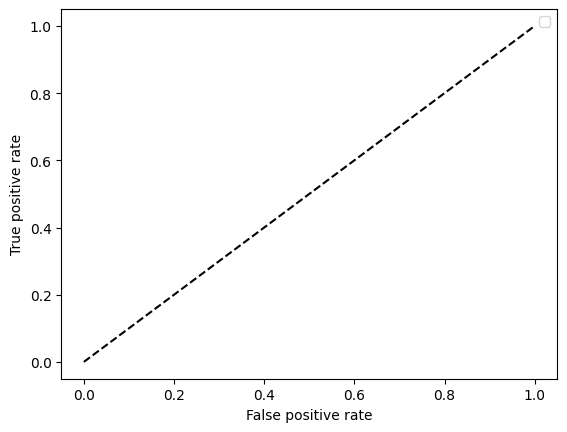

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_proba =loaded_model.predict(validation_generator)
fpr, tpr, thresholds = roc_curve(validation_generator.classes, y_pred_proba)

roc_auc = auc(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show


In [28]:
from google.colab import files
uploaded = files.upload()  # Upload e.g. 'mycat.jpg'

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path = 'download.jpg'  # Replace with your filename
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

prediction = loaded_model.predict(img_array)
print("Predicted class:", "Dog" if prediction[0][0] > 0.5 else "Cat")

Saving download.jpg to download.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted class: Dog


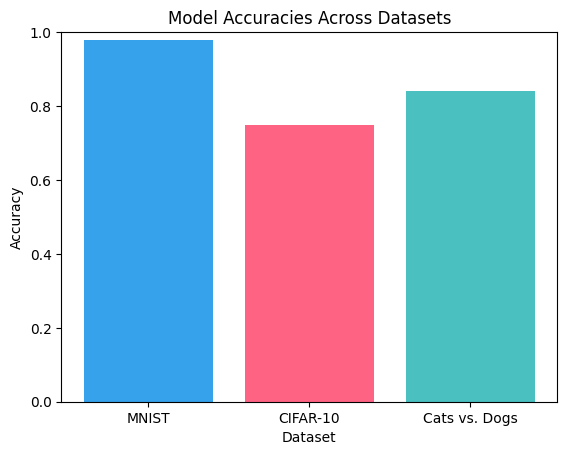

In [27]:
import matplotlib.pyplot as plt
datasets = ['MNIST', 'CIFAR-10', 'Cats vs. Dogs']
accuracies = [0.98, 0.75, 0.84]
plt.bar(datasets, accuracies, color=['#36A2EB', '#FF6384', '#4BC0C0'])
plt.title('Model Accuracies Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()

